In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os , shutil

In [2]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount('/content/drive')
!pwd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [6]:
!unzip 'drive/My Drive/Copy of covid_data.zip'

Archive:  drive/My Drive/Copy of covid_data.zip
  inflating: val/corona/1.jpeg       
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg  
  inflating: val/corona/ryct.2020200034.fig5-day7.jpeg  
  inflating: val/normal/IM-0154-0001.jpeg  
  inflating: val/normal/IM-0141-0001.jpeg  
  inflating: val/normal/IM-0140-0001.jpeg  
  inflating: val/normal/IM-0156-0001.jpeg  
  inflating: val/normal/IM-0149-0001.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: val/normal/IM-0151-0001.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg  
  inflating: val/normal/IM-0147-0001.jpeg  
  inflating: val/normal/IM-0145-0001.jpeg  
  inflating: test/normal/IM-0115-0001.jpeg  
  inflating: val/normal/IM-0152-0001.jpeg  
  inflating: test/corona/SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg  
  inflating: test/coro

In [9]:
source = 'drive/My Drive/Copy of covid_data.zip'
print(os.path.exists(source))

True


Prepare the Data

In [0]:
train = 'train'

In [0]:
val = 'val'
test = 'test'

In [0]:
gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                         width_shift_range= 0.2,
                         height_shift_range= 0.2,
                         zoom_range = 0.2, 
                         shear_range= 0.2,
                         fill_mode = 'nearest')
                        

In [13]:
train_gen = gen.flow_from_directory(train , target_size= (200,200) , class_mode='binary' , batch_size=20  )

Found 244 images belonging to 2 classes.


In [14]:
val_gen = gen.flow_from_directory(val , target_size=(200,200) , class_mode="binary" , batch_size=20)

Found 20 images belonging to 2 classes.


In [0]:
#Making MOdel 
model1 = models.Sequential()

In [16]:
counter =0
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
1
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
2
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
3
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
4
4


In [17]:
data_batch[0]
labels_batch[0]

0.0

Making a Model 

In [0]:

model = model1


In [0]:
model.add(layers.Conv2D(32,(3,3), activation='relu' , input_shape = (200,200,3)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))




In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 128)      

Compile Model 

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4) ,
              loss="binary_crossentropy" , 
              metrics= ['acc'])

In [22]:
histore = model.fit(train_gen,steps_per_epoch=70,epochs=10, validation_data=val_gen, validation_steps=30)

                      
                      
                      



Epoch 1/10
70/70 [==============================] - 70s 1s/step - loss: 0.6319 - acc: 0.6304 - val_loss: 0.4286 - val_acc: 0.9250
Epoch 2/10
70/70 [==============================] - 62s 885ms/step - loss: 0.4174 - acc: 0.8391 - val_loss: 0.2289 - val_acc: 0.8783
Epoch 3/10
70/70 [==============================] - 68s 965ms/step - loss: 0.3644 - acc: 0.8535 - val_loss: 0.1375 - val_acc: 0.9550
Epoch 4/10
70/70 [==============================] - 60s 851ms/step - loss: 0.2802 - acc: 0.8803 - val_loss: 0.0825 - val_acc: 0.9667
Epoch 5/10
70/70 [==============================] - 60s 859ms/step - loss: 0.2472 - acc: 0.9030 - val_loss: 0.3002 - val_acc: 0.9300
Epoch 6/10
70/70 [==============================] - 66s 946ms/step - loss: 0.2226 - acc: 0.9141 - val_loss: 0.0847 - val_acc: 0.9867
Epoch 7/10
70/70 [==============================] - 59s 844ms/step - loss: 0.1613 - acc: 0.9371 - val_loss: 0.1736 - val_acc: 0.9767
Epoch 8/10
70/70 [==============================] - 65s 933ms/step - los

Prepare test Data

In [23]:
test_gen = gen.flow_from_directory(test , target_size=(200,200) , class_mode='binary' , batch_size= 20)
                                   

Found 20 images belonging to 2 classes.


In [24]:
counter =0
for data_b, labels_b in test_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
1
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
2
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
3
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
4
4


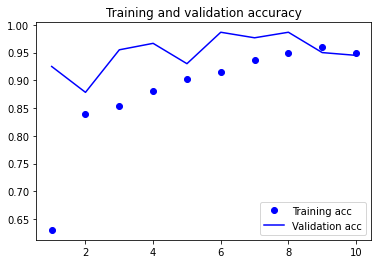

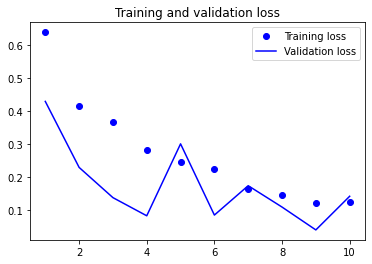

In [25]:
%matplotlib inline  
import matplotlib.pyplot as plt
history = histore.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Test a single Image of Corona and non corona x-ray 

In [0]:
d = 'test/normal/IM-0131-0001.jpeg' # non corona image
f = "test/corona/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg"  # corona image

In [0]:
t = image.load_img(d ,target_size=(200,200))
t= image.img_to_array(t)
t = np.expand_dims(t , axis=0)
t/= 255.

tf = image.load_img(f ,target_size=(200,200))
tf= image.img_to_array(tf)
tf = np.expand_dims(tf , axis=0)
tf/= 255.

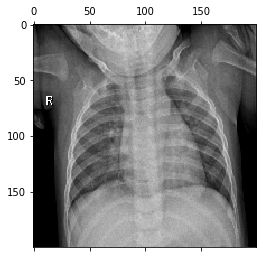

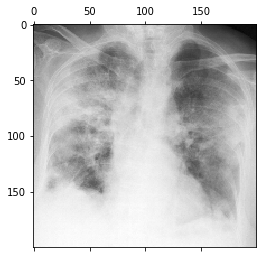

In [28]:
plt.matshow(t[0]) # non corona image
plt.matshow(tf[0]) # corona image

In [0]:
b = model.predict(t[[0]])
a = model.predict(tf[[0]])

In [30]:
if a<.50:
  print("corona")


corona


In [31]:
if b>.50 :
  print('good health')

good health


Making a list as per prediction on test data

In [0]:
# TEST the MOdel
predict = model.predict(test_gen)
predict = list(predict)

In [0]:
prediction =[]


In [0]:
for i in predict:
  if i>.50:
    prediction.append("Healthy")
  else:
    prediction.append('CORONA VIRUS')

In [41]:
prediction,predict

(['Healthy',
  'CORONA VIRUS',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'Healthy',
  'Healthy',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'Healthy',
  'Healthy',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS'],
 [array([0.9953799], dtype=float32),
  array([0.01862515], dtype=float32),
  array([0.9994628], dtype=float32),
  array([0.00198203], dtype=float32),
  array([0.00280368], dtype=float32),
  array([0.00200832], dtype=float32),
  array([0.00356694], dtype=float32),
  array([0.01171513], dtype=float32),
  array([0.99997234], dtype=float32),
  array([0.9995964], dtype=float32),
  array([0.99765825], dtype=float32),
  array([0.9857647], dtype=float32),
  array([0.00173493], dtype=float32),
  array([0.00601791], dtype=float32),
  array([0.9999527], dtype=float32),
  array([0.9999051], dtype=float32),
  array([0.99365544], dtype=float32),
  array([0.9783546], dtype=float32),
  array([0.0

In [0]:
model.save('Covide19 .h5')